# ATOC5860 - central_limit_theorem - Lecture #2
##### Originally coded by Prof. Barnes (CSU), updated/adapted for Jupyter Notebook/Python3 by Prof. Kay (CU)
##### Last updated: January 16, 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
%matplotlib inline

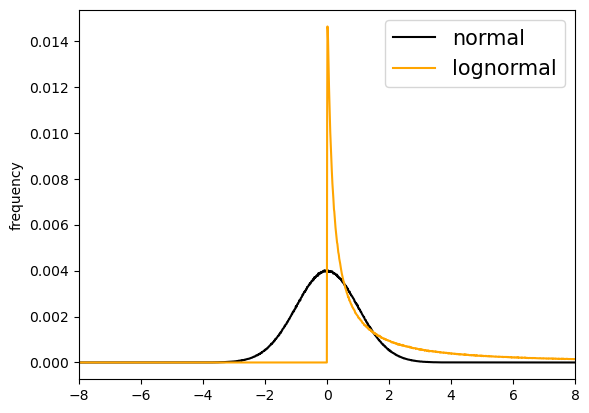

In [2]:
### Plot Different Types of Distributions - Normal, Lognormal
N0 = 10000000
xinc = np.arange(-10,10,.01)
Rblack = np.random.normal(0,1,size=(N0,))
Rorange= np.random.lognormal(0.,2.,size=(N0,))
Rblue = np.random.uniform(-5.,5.,size=(N0,))

hx = np.histogram(Rblack,xinc)
plt.plot(hx[1][:-1],hx[0]/float(N0),'-',color='black',label='normal')
hx = np.histogram(Rorange,xinc)
plt.plot(hx[1][:-1],hx[0]/float(N0),'-',color='orange',label='lognormal')

plt.legend(fontsize = 15)
plt.ylabel('frequency')
plt.xlim(-8,8);

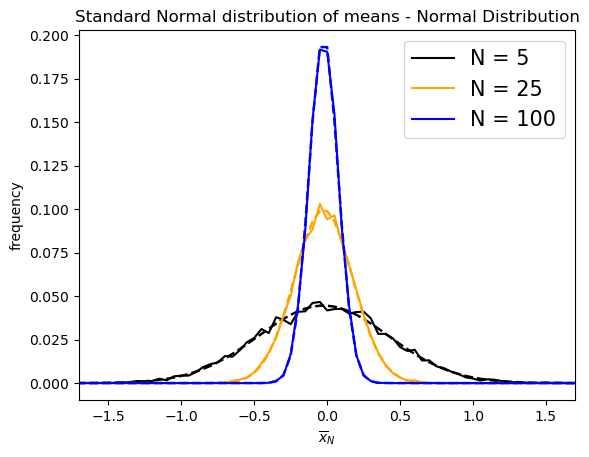

In [3]:
### Test Central Limit Theorem with a Normal Distribution
# Compare monte carlo selection of normal distribution (solid) with z-statistics calculation (dashed) for increasing N.
# Distribution should narrow and approach 0 as N increases - Showing the central limit theorem.
# In other words -- as the sample gets large enough you can use the normally distributed z-statistic to estimate
# probabilities of getting that mean.

bin_width = .05
for N in (5, 25, 100):
    y2 = []
    if(N == 5):
        clr = 'black'
    elif(N==25):
        clr = 'orange'
    elif(N==100):
        clr = 'blue'            
    for i in np.arange(0,10000):    
        y2.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))            
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y2hist, x = np.histogram(y2,bins = bins)    
    x = bins[0:-1]
    plt.plot(x,y2hist/(float(len(y2))), color = clr, label = 'N = ' + str(N))
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = 0, scale = 1./np.sqrt(N)), color = clr, linestyle = '--', linewidth = 1.75)

plt.xticks(np.arange(-10,10,2))
plt.xticks(np.arange(-2,2,.5))
plt.xlim(-1.7,1.7)
plt.xlabel(r'$\overline{x}_N$')
plt.ylabel('frequency')
plt.legend(fontsize = 15)
plt.title('Standard Normal distribution of means - Normal Distribution');

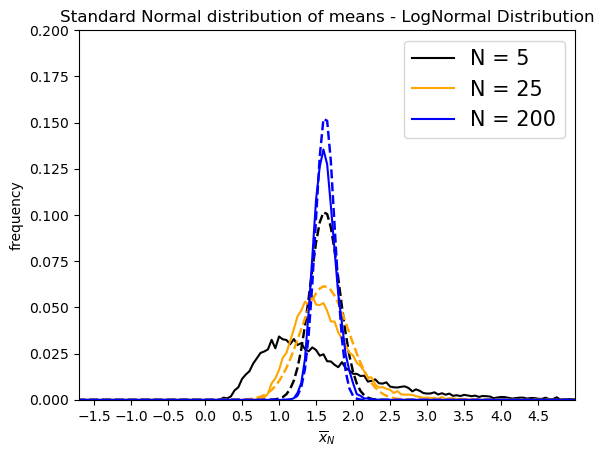

In [4]:
### Test Central Limit Theorem with a LogNormal Distribution
# Plot Standard Log-Normal Distribution of Means for an increasing number of samples N
# Compare monte carlo selection (solid) with z-statistics statistics calculation (dashed)
bin_width = .05
for N in (5, 25, 200):
    y3 = []
    if(N == 5):
        clr = 'black'
    elif(N==25):
        clr = 'orange'
    elif(N==200):
        clr = 'blue'            
    for i in np.arange(0,10000):    
        y3.append(np.mean(np.random.lognormal(mean = 0, sigma = 1, size = N)))          
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y3hist, x = np.histogram(y3,bins = bins)    
    x = bins[0:-1]
    plt.plot(x,y3hist/(float(len(y2))), color = clr, label = 'N = ' + str(N))
    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = N))
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y3), scale = sigma_y3/np.sqrt(N)), color = clr, linestyle = '--', linewidth = 1.75)

plt.xticks(np.arange(-10,10,2))
plt.xticks(np.arange(-2,5,.5))
plt.xlim(-1.7,5)
plt.ylim(0,0.2)
plt.xlabel(r'$\overline{x}_N$')
plt.ylabel('frequency')
plt.legend(fontsize = 15)
plt.title('Standard Normal distribution of means - LogNormal Distribution');